Import libraries and packages required

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np 
import time
import random 
import warnings
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

Load Data 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/

path = '/content/gdrive/My Drive/Colab Notebooks/prices-split-adjusted.csv'
data = pd.read_csv(path,index_col=0)
data_full = pd.read_csv(path)

Mounted at /content/gdrive
/content/gdrive/My Drive


IDA 

In [ ]:
# print(data.head())
print('shape of data:',data.shape)
print('Type of data:',type(data))
print(data.dtypes)
print(data.describe())

# Check for missing values 
print(data.isnull().sum())

# Check the number of companies 
print(data.symbol.nunique())
print(data.symbol.value_counts())

# Group data based on the company
data_grouped = data.groupby('symbol')
print(data_grouped.mean())


shape of data: (851264, 6)
Type of data: <class 'pandas.core.frame.DataFrame'>
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object
                open          close            low           high        volume
count  851264.000000  851264.000000  851264.000000  851264.000000  8.512640e+05
mean       64.993618      65.011913      64.336541      65.639748  5.415113e+06
std        75.203893      75.201216      74.459518      75.906861  1.249468e+07
min         1.660000       1.590000       1.500000       1.810000  0.000000e+00
25%        31.270000      31.292776      30.940001      31.620001  1.221500e+06
50%        48.459999      48.480000      47.970001      48.959999  2.476250e+06
75%        75.120003      75.139999      74.400002      75.849998  5.222500e+06
max      1584.439941    1578.130005    1549.939941    1600.930054  8.596434e+08
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: 

Choosing Stock and dividing stock data to train and test

In [ ]:
# Selecting one stock from the data of stocks
stocks = dict(tuple(data_grouped))
# random.seed(123)
stock = random.choice(list(stocks))
# print(stock)
stock_data = stocks[stock]
# print(stock_data)

# Dividing data to 80% training data and 20% test data
training_idx = int(0.8 * stock_data.shape[0])
training_data = stock_data[:training_idx]
testing_data = stock_data[training_idx:]

# print(training_data.shape)
# print(testing_data.shape)
# print(training_data)
# print(testing_data)

EDA 

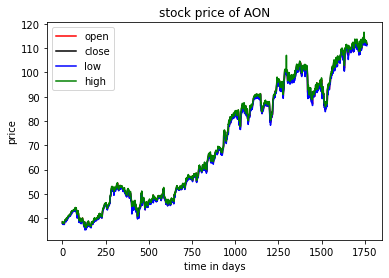

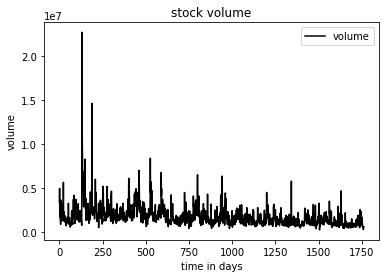

            open     close       low      high    volume
open    1.000000  0.999563  0.999819  0.999794 -0.421795
close   0.999563  1.000000  0.999804  0.999786 -0.421237
low     0.999819  0.999804  1.000000  0.999747 -0.424827
high    0.999794  0.999786  0.999747  1.000000 -0.417865
volume -0.421795 -0.421237 -0.424827 -0.417865  1.000000


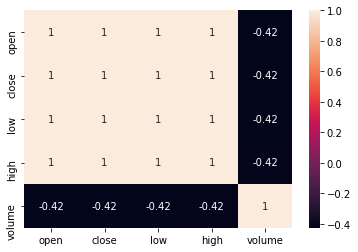

In [ ]:

# EDA for a single company stocks
temp = data[data.symbol==stock]
# print(temp)
plt.plot(temp['open'].values, color='red', label='open')
plt.plot(temp['close'].values, color='black', label='close')
plt.plot(temp['low'].values, color='blue', label='low')
plt.plot(temp['high'].values, color='green', label='high')
plt.title('stock price of {}'.format(stock))
plt.xlabel('time in days')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

plt.plot(temp['volume'].values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time in days')
plt.ylabel('volume')
plt.legend(loc='best')
plt.show()

relation = temp.corr()
print(relation)
sn.heatmap(relation,annot=True)
plt.show()

warnings.filterwarnings("ignore")

Pre-processing and Data Preparation 

In [ ]:
# Remove the symbol of stock from the chosen stock data 
training_data.drop(['symbol'],axis=1,inplace=True)
testing_data.drop(['symbol'],axis=1,inplace=True)
# print(training_data)
# print(testing_data)

# Function to Normalize the data
def normalize(train_data,test_data):
  scaler = preprocessing.MinMaxScaler()
  scaler.fit(train_data)
  train_data_transform = scaler.transform(train_data)
  test_data_transform = scaler.transform(test_data)
  return train_data_transform, test_data_transform

# def standardize(df):
#   scaler = preprocessing.StandardScaler()
#   standardized_data = scaler.fit_transform(df)
#   return standardized_data

training_data_preprocessed,testing_data_preprocessed = normalize(training_data,testing_data)
# print(training_data_preprocessed)
# print(testing_data_preprocessed)

# Preparing data to train and test in models
x_train = training_data_preprocessed[:, [0,2,3,4]]
y_train = training_data_preprocessed[:,[1]]
x_test = testing_data_preprocessed[:, [0,2,3,4]]
y_test = testing_data_preprocessed[:,[1]]
# print('x_train.shape = ',x_train.shape)
# print('y_train.shape = ', y_train.shape)
# print('x_test.shape = ', x_test.shape)
# print('y_test.shape = ',y_test.shape)


Linear Regression

Coefficients: [[-0.62974336  0.91218652  0.73817984  0.0035578 ]]
Model Performance
Coefficient of determination: 0.9976
Mean squared error: 0.0000
RSS: 0.0137
Execution time in seconds:0.0202


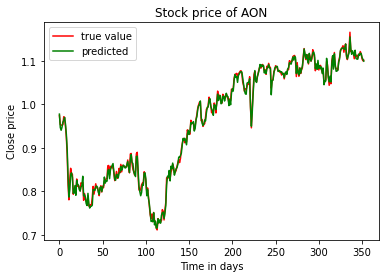

In [ ]:
start = time.time()
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
lr_preds = lr_model.predict(x_test)
lr_rsquared_train = lr_model.score(x_train,y_train)
lr_rsquared_test = lr_model.score(x_test,y_test)
lr_rss = ((y_test - lr_preds) ** 2).sum()
lr_mse = mean_squared_error(y_test, lr_preds)
end = time.time()
lr_execution_time = end - start 
print('Model performance')
print('Coefficients:',lr_model.coef_)
print('Model Performance')
print('Coefficient of determination: %.4f' % lr_rsquared_test)
print('Mean squared error: %.4f' % lr_mse)
print('RSS: %.4f' % lr_rss)
print('Execution time in seconds:{:0.4f}'.format(lr_execution_time))

plt.plot(y_test,color='red',label='true value')
plt.plot(lr_preds, color='green',label='predicted')
plt.title('Stock price of {}'.format(stock))
plt.xlabel('Time in days')
plt.ylabel('Close price')
plt.legend(loc='best')
plt.show()